In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [ ]:
DATA_PATH = '../../data'

In [2]:
df = pd.read_parquet(f'{DATA_PATH}/raw/data.pqt')
# remove rows where memo is the same as category_description
df = df[df["memo_clean"] != df["category_description"]]

df.head()

,prism_consumer_id,prism_account_id,memo_clean,amount,category_description
0,0,acc_0,Kroger,20.98,GROCERIES
1,0,acc_0,CASH APP*FREE XXXXXXXXXX CA XX/XX,200.00,GENERAL_MERCHANDISE
7,0,acc_0,Amazon.com*HXXXWXXQX Amzn.com/bill WA XX/XX,33.20,GENERAL_MERCHANDISE
9,0,acc_0,Amazon,42.79,GENERAL_MERCHANDISE
10,0,acc_0,Kroger,36.55,GROCERIES


In [3]:
df["category_description"].unique()

array(['GROCERIES', 'GENERAL_MERCHANDISE', 'FOOD_AND_BEVERAGES', 'TRAVEL',
       'PETS', 'OVERDRAFT', 'RENT', 'EDUCATION', 'MORTGAGE'], dtype=object)

In [4]:
cat_group = (
    df[["amount", "category_description"]]
    .groupby("category_description")
)
num_purchases = cat_group.count()
avg_purchase = cat_group.mean()
max_purchase = cat_group.max()

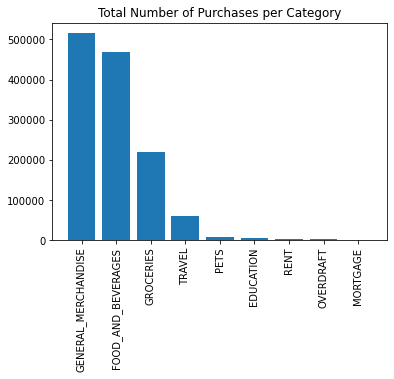

In [5]:
num_purchases = num_purchases.sort_values("amount", ascending=False)
plt.bar(num_purchases.index, num_purchases["amount"])
plt.xticks(rotation=90)
plt.title("Total Number of Purchases per Category");

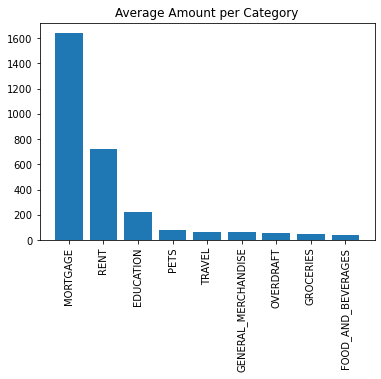

In [6]:
avg_purchase = avg_purchase.sort_values("amount", ascending=False)
plt.bar(avg_purchase.index, avg_purchase["amount"])
plt.xticks(rotation=90)
plt.title("Average Amount per Category");

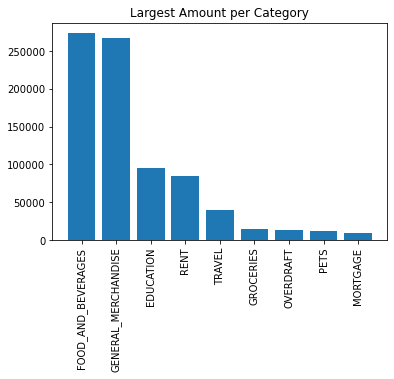

In [7]:
max_purchase = max_purchase.sort_values("amount", ascending=False)
plt.bar(max_purchase.index, max_purchase["amount"])
plt.xticks(rotation=90)
plt.title("Largest Amount per Category");

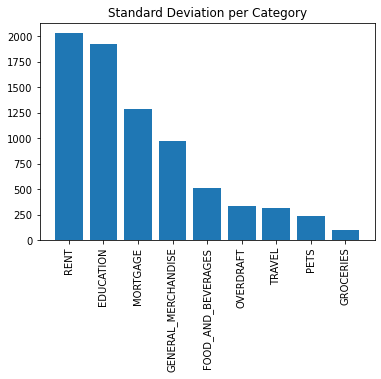

In [8]:
std_purchases = cat_group.std()
std_purchases = std_purchases.sort_values("amount", ascending=False)
plt.bar(std_purchases.index, std_purchases["amount"])
plt.xticks(rotation=90)
plt.title("Standard Deviation per Category");

In [13]:
df[df["memo_clean"].str.contains("\*")]

,prism_consumer_id,prism_account_id,memo_clean,amount,category_description
1,0,acc_0,CASH APP*FREE XXXXXXXXXX CA XX/XX,200.00,GENERAL_MERCHANDISE
7,0,acc_0,Amazon.com*HXXXWXXQX Amzn.com/bill WA XX/XX,33.20,GENERAL_MERCHANDISE
24,0,acc_0,CASH APP*FREE XXXXXXXXXX CA XX/XX,190.00,GENERAL_MERCHANDISE
30,0,acc_0,CASH APP*FREE XXXXXXXXXX CA XX/XX,50.00,GENERAL_MERCHANDISE
35,0,acc_0,CASH APP*RANDY GART XXXXXXXXXX CA XX/XX,25.00,GENERAL_MERCHANDISE
...,...,...,...,...,...
5197125,5941,acc_9244,TST* Tutus Lafa XX Lafayette Cir Lafayette CAUS,50.50,FOOD_AND_BEVERAGES
5197143,5941,acc_9244,DNH*GODADDY.COM XXXX E GoDaddy Way XXX-XXXXXXX...,18.98,GENERAL_MERCHANDISE
5197158,5941,acc_9244,EIG*CONSTANTCON XXXX Trapelo Road XXX-XXXXXXX ...,55.00,GENERAL_MERCHANDISE
5197198,5941,acc_9244,TST* NORM'S PLAC,3.81,FOOD_AND_BEVERAGES
